<a href="https://colab.research.google.com/github/lodxdy/AI-ML/blob/main/AI_and_ML_Complete_Guide_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis

# Twitter dataset

## Loading the data

In [ ]:
!pip install spacy --upgrade

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns
import numpy as np
import re # regular expressions
import random

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Cursos - recursos/NLP/train.csv', header = None,
                         names = ['sentiment', 'id', 'date', 'query', 'user', 'text'], encoding = 'latin1')

In [ ]:
train_data

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
train_data['sentiment'].unique()

array([0, 4])

<Axes: xlabel='sentiment', ylabel='count'>

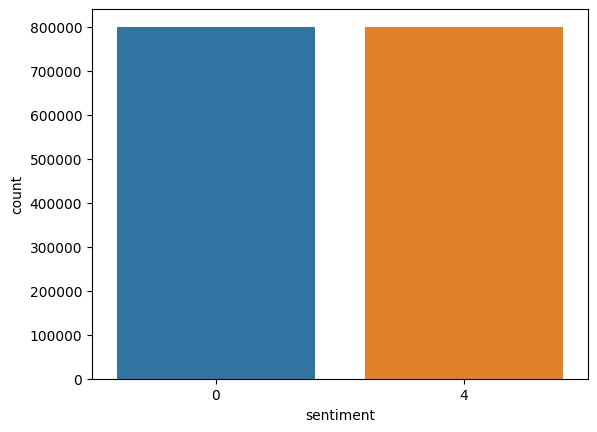

In [ ]:
sns.countplot(x = train_data['sentiment'])

In [ ]:
np.unique(train_data['sentiment'], return_counts = True)

(array([0, 4]), array([800000, 800000]))

In [ ]:
train_data = train_data.drop(['id', 'date', 'query', 'user'], axis = 1)
train_data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


## Train and test data

In [ ]:
X = train_data.iloc[:, 1].values
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [ ]:
y = train_data.iloc[:, 0].values
y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.97)

In [ ]:
X.shape, y.shape

((48000,), (48000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, y_train.shape

((38400,), (38400,))

In [ ]:
X_test.shape, y_test.shape

((9600,), (9600,))

In [ ]:
np.unique(y_train, return_counts = True)

(array([0, 4]), array([19257, 19143]))

In [ ]:
np.unique(y_test, return_counts = True)

(array([0, 4]), array([4796, 4804]))

# Preprocessing the data

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp

In [ ]:
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)
  sentence = re.sub(r"https?://[A-Za-z0-9./]+", ' ', sentence)
  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])

  return tokens

In [ ]:
preprocessing("@switchfoot https://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

'awww bummer shoulda got david carr day'

In [ ]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train]

In [ ]:
for _ in range(10):
  print(X_train_cleaned[random.randint(0, len(X_train_cleaned))])

approx working hours weekend umzug serveraufbau durcharbeiten
ok let try translation happens play golf tourneys spring
trying find people said
year m0re like year
work morning afternoon different story
oooh think learned css liked column thing think worked
believe fly ness conquer shy ness buenos dias tweety birds
legally allowed copy forward press coverage governing body allowed
aww teasing watson classy guy hit mom wear dress
went bed 10:30 night woke exhausted sick


In [ ]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test]

# Sentiment analysis with NLTK

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk_classifier = SentimentIntensityAnalyzer()
nltk_classifier.polarity_scores('I love this food')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [ ]:
nltk_classifier.polarity_scores('I hate this food')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [ ]:
nltk_classifier.polarity_scores('I have this food')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
X_train_cleaned[0]

'yes know barcampbkk3'

In [ ]:
nltk_classifier.polarity_scores(X_train_cleaned[0])

{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}

In [ ]:
X_train_cleaned[20002]

'ahhhhhhhhh misinformed!loljust kidding'

In [ ]:
nltk_classifier.polarity_scores(X_train_cleaned[20002])

{'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'compound': 0.1759}

In [ ]:
for sentence in X_test:
  print(nltk_classifier.polarity_scores(sentence), ' - ', sentence)

Streaming output truncated to the last 5000 lines.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}  -  @siliconkibou And you already have a reply 
{'neg': 0.268, 'neu': 0.555, 'pos': 0.177, 'compound': -0.5813}  -  OK, crisis averted...at least with regard to Big Fluffy, who just wandered into my room like nothing was the matter...the shithead. 
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}  -  Watching movies, installing windows7 rc1, and coding websites. Just how I like to spend my weekends 
{'neg': 0.375, 'neu': 0.455, 'pos': 0.17, 'compound': -0.4215}  -  feeling sick had to go home 
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4199}  -  @Javamomma  Thank you! 
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732}  -  has been 2 france well gd skl 2moz   
{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.8126}  -  Still at work. My last appointment in 10 then to hangout with my best friend ever. 
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

# Sentiment analysis with spaCy

- Documentation: https://spacy.io/usage/training

In [ ]:
example = [["this is a positive text", {"POSITIVE": True, "NEGATIVE": False}],
           ["this is a negative text", {"POSITIVE": False, "NEGATIVE": True}]]

In [ ]:
X_train_spacy = []
for text, sentiment in zip(X_train_cleaned, y_train):
  #print(text, sentiment)
  if sentiment == 4:
    dic = ({'POSITIVE': True, 'NEGATIVE': False})
  elif sentiment == 0:
    dic = ({'POSITIVE': False, 'NEGATIVE': True})
  X_train_spacy.append([text, dic])

In [ ]:
X_train_spacy[0:5]

[['yes know barcampbkk3', {'POSITIVE': False, 'NEGATIVE': True}],
 ['thanks', {'POSITIVE': False, 'NEGATIVE': True}],
 ['invite', {'POSITIVE': False, 'NEGATIVE': True}],
 ['thanks girl said worry feel bad', {'POSITIVE': False, 'NEGATIVE': True}],
 ['yes know samuels', {'POSITIVE': False, 'NEGATIVE': True}]]

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
classifier_spacy = spacy.blank('en')
classifier_spacy.pipe_names

[]

In [ ]:
textcat = classifier_spacy.add_pipe('textcat')
classifier_spacy.pipe_names

['textcat']

In [ ]:
textcat.add_label('POSITIVE')
textcat.add_label('NEGATIVE')

1

In [ ]:
textcat.label_data

('POSITIVE', 'NEGATIVE')

In [ ]:
len(X_train_spacy)

38400

In [ ]:
38400 / 1024

37.5

In [ ]:
from spacy.training import Example
classifier_spacy.begin_training()
for epoch in range(10):
  random.shuffle(X_train_spacy)
  losses = {}
  for batch in spacy.util.minibatch(X_train_spacy, 1024):
    texts = [classifier_spacy.make_doc(text) for text, entities in batch]
    annotations = [{'cats': entities} for text, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(texts, annotations)]
    classifier_spacy.update(examples, losses=losses)
  print(losses)

{'textcat': 8.065366238355637}
{'textcat': 5.804046705365181}
{'textcat': 4.2074990049004555}
{'textcat': 2.666529804468155}
{'textcat': 1.524140290915966}
{'textcat': 0.8899253662675619}
{'textcat': 0.6614904785528779}
{'textcat': 0.6110410680994391}
{'textcat': 0.5157443787902594}
{'textcat': 0.47649500519037247}


In [ ]:
classifier_spacy.to_disk('classifier_spacy')

In [ ]:
classifier_spacy_loaded = spacy.load('classifier_spacy')
classifier_spacy_loaded

In [ ]:
y_test[4863]

0

In [ ]:
negative_text = X_test_cleaned[4863]
negative_text

'summer boring outside activities'

In [ ]:
prediction = classifier_spacy_loaded(negative_text)
prediction

summer boring outside activities

In [ ]:
prediction.cats

{'POSITIVE': 0.0013006930239498615, 'NEGATIVE': 0.9986993074417114}

In [ ]:
y[2020]

4

In [ ]:
positive_text = X_test_cleaned[2020]
positive_text

'good glad hear super excited'

In [ ]:
prediction = classifier_spacy_loaded(positive_text)
prediction.cats

{'POSITIVE': 0.9999994039535522, 'NEGATIVE': 6.461746693275927e-07}

In [ ]:
classifier_spacy_loaded('i have this food').cats

{'POSITIVE': 0.9551250338554382, 'NEGATIVE': 0.04487501457333565}

In [ ]:
predictions = []
for text in X_test_cleaned:
  #print(text)
  prediction = classifier_spacy_loaded(text)
  predictions.append(prediction.cats)

In [ ]:
predictions

[{'POSITIVE': 8.266622899100184e-05, 'NEGATIVE': 0.9999172687530518},
 {'POSITIVE': 0.03973793983459473, 'NEGATIVE': 0.9602620005607605},
 {'POSITIVE': 0.9994310736656189, 'NEGATIVE': 0.0005689201643690467},
 {'POSITIVE': 0.9982727766036987, 'NEGATIVE': 0.0017272736877202988},
 {'POSITIVE': 0.9672117233276367, 'NEGATIVE': 0.032788317650556564},
 {'POSITIVE': 0.9141833782196045, 'NEGATIVE': 0.0858166515827179},
 {'POSITIVE': 0.016180988401174545, 'NEGATIVE': 0.9838190674781799},
 {'POSITIVE': 0.41301754117012024, 'NEGATIVE': 0.5869824886322021},
 {'POSITIVE': 0.9999995231628418, 'NEGATIVE': 4.188690070350276e-07},
 {'POSITIVE': 0.00038139551179483533, 'NEGATIVE': 0.9996185302734375},
 {'POSITIVE': 0.49803870916366577, 'NEGATIVE': 0.501961350440979},
 {'POSITIVE': 0.36434128880500793, 'NEGATIVE': 0.6356586813926697},
 {'POSITIVE': 0.02349572815001011, 'NEGATIVE': 0.9765042662620544},
 {'POSITIVE': 0.23594658076763153, 'NEGATIVE': 0.7640534043312073},
 {'POSITIVE': 0.3335604965686798, 'NE

In [ ]:
predictions2 = []
for prediction in predictions:
  if prediction['POSITIVE'] > prediction['NEGATIVE']:
    predictions2.append(4)
  else:
    predictions2.append(0)
predictions2 = np.array(predictions2)

In [ ]:
predictions2

array([0, 0, 4, ..., 4, 0, 4])

In [ ]:
y_test

array([0, 0, 4, ..., 4, 0, 4])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions2)

0.6896875

In [ ]:
cm = confusion_matrix(y_test, predictions2)
cm

array([[3295, 1501],
       [1478, 3326]])

<Axes: >

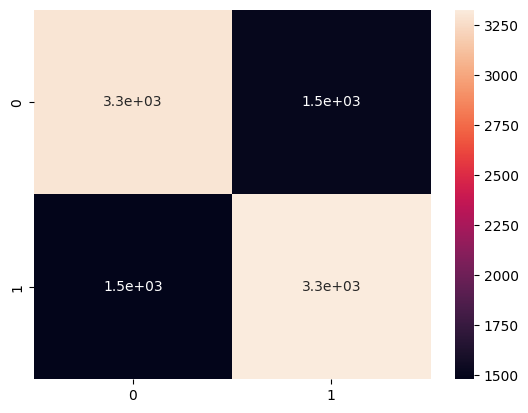

In [ ]:
sns.heatmap(cm, annot=True)